In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
from statsmodels.formula.api import ols      # For n-way ANOVA
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [2]:
#Read the data
df = pd.read_csv("SalaryData.csv")

In [3]:
df.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [5]:
df.shape

(40, 3)

In [6]:
df.describe().T

count        mean           std      min      25%       50%  \
Salary   40.0  162186.875  64860.407506  50103.0  99897.5  169100.0   

              75%       max  
Salary  214440.75  260151.0

In [7]:
n=df.shape[0]*df.shape[1] 
k=df.shape[1] 
print("The total number of observations is",n )
print("The number of groups is",k)

The total number of observations is 120
The number of groups is 3


In [8]:
#Degree of freedom between groups
dfb=k-1
print('Degree of Freedom between groups',dfb)
#Degree of freedom within groups
dfw=n-k
print('Degree of Freedom within groups',dfw)

Degree of Freedom between groups 2
Degree of Freedom within groups 117


In [9]:
df.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [10]:
df_e= df.drop(['Occupation'], axis=1) # creating a new dataframe without the Occupation column

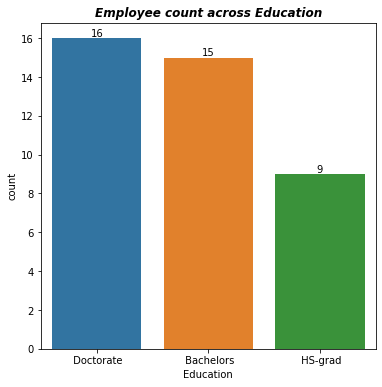

In [11]:
plt.figure(figsize =(6,6))
ax = sns.countplot(x = 'Education',  data = df)
ax.set_title("Employee count across Education", fontsize=12, weight='bold', style='italic')
ax.bar_label(ax.containers[0], label_type='edge');

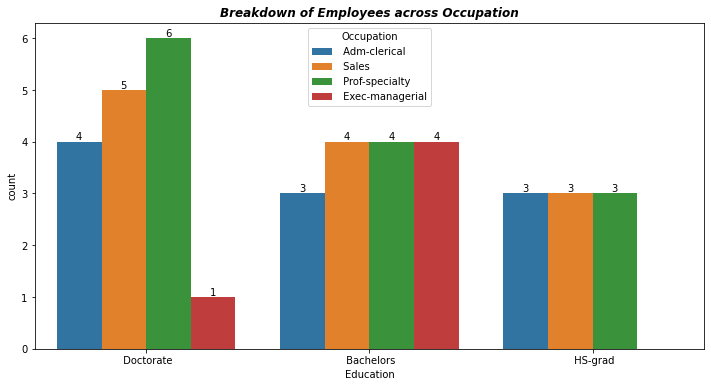

In [12]:
plt.figure(figsize =(12,6))
ax = sns.countplot(x = 'Education', hue='Occupation', data = df)
ax.set_title("Breakdown of Employees across Occupation", fontsize=12, weight='bold', style='italic')
ax.bar_label(ax.containers[0], label_type='edge');
ax.bar_label(ax.containers[1], label_type='edge');
ax.bar_label(ax.containers[2], label_type='edge');
ax.bar_label(ax.containers[3], label_type='edge');

## Filtering the stacked data

In [13]:
a = df_e[df_e['Education'] == ' Doctorate']
b = df_e[df_e['Education'] == ' Bachelors']
c = df_e[df_e['Education'] == ' HS-grad']

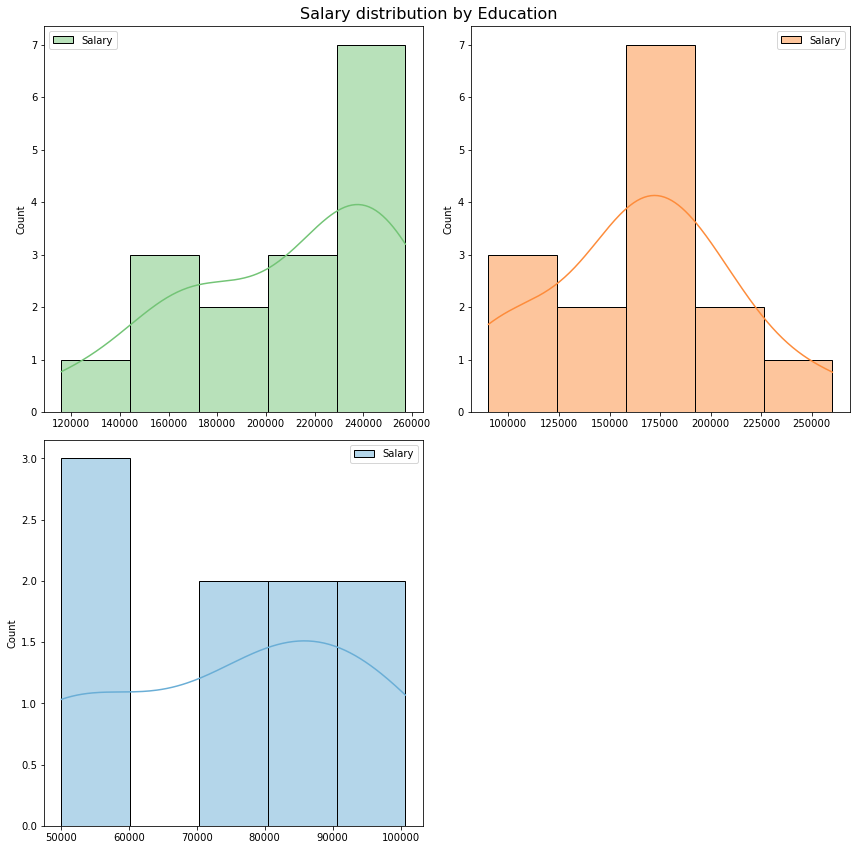

In [14]:
plt.figure(figsize =(12,12))
plt.subplot(2,2,1) ## Row - Column - Order
sns.histplot(a, kde =True, palette= 'Greens') 
plt.subplot(2,2,2) 
sns.histplot(b, kde =True, palette ='Oranges')
plt.subplot(2,2,3)
sns.histplot(c, kde =True, palette='Blues')

plt.suptitle("Salary distribution by Education", fontsize =16)
plt.tight_layout();

## Test for Normality -  Shapiro- Wilk Test

### these tests are done for practice/reference only

### Null Hypothesis : The given observation is normally distributed
### Alternative Hypothesis : The given observation is not normally distributed

In [15]:
## Post filtering we apply the shapiro- Wilk Test
#The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
#alpha = 0.05
t1,p1 = stats.shapiro(a['Salary'])
t2,p2 = stats.shapiro(b['Salary'])
t3,p3 = stats.shapiro(c['Salary'])
print(p1,p2,p3)

0.0675690770149231 0.7050924301147461 0.1783432960510254


### p-value is higher than alpha =0.05, that means,  we go ahead with null hypothesis as the observations are normally distributed

## Levene's Test
#### Computes homogeneity of variance across groups.

### The Levene test tests the null hypothesis that all input samples are from populations with equal variances.
### alpha = 0.05

### Null Hypothesis: Ho -The variances in the given dataset is the same
### Alternative Hypothesis: Ha - The variances in the given dataset is different 

In [16]:
LT = stats.levene(a['Salary'], b['Salary'], c['Salary'])
print(LT)

LeveneResult(statistic=1.8800921605836554, pvalue=0.16686425699301183)


#### Since p-value is greater than 0.05, we shall proceed with null hypothesis that the variances are the same

# Formulate the Null and Alternate Hypothesis

𝐻0 : The mean Salary of an individual is same across all levels of Education 

𝐻1 : The mean Salary of an individual is different for atleast one level of Education

# One Way Anova
**Now, let us go ahead and perform one way ANOVA for 'Education' with respect to 'Salary'.**

In [17]:
formula = 'Salary ~ C(Education)' ## y = f(X)
model = ols(formula, df_e).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


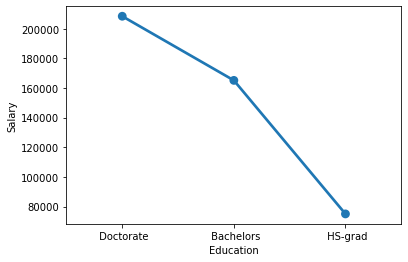

In [18]:
sns.pointplot(x ='Education', y='Salary', data =df_e, ci=None);

In [19]:
df.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

In [20]:
df_o= df.drop(['Education'], axis=1) # creating a new dataframe without the Education column

## Filtering the stacked data

In [21]:
d = df_o[df_o['Occupation'] == ' Adm-clerical']
e = df_o[df_o['Occupation'] == ' Sales']
f = df_o[df_o['Occupation'] == ' Prof-specialty']
g = df_o[df_o['Occupation'] == ' Exec-managerial']

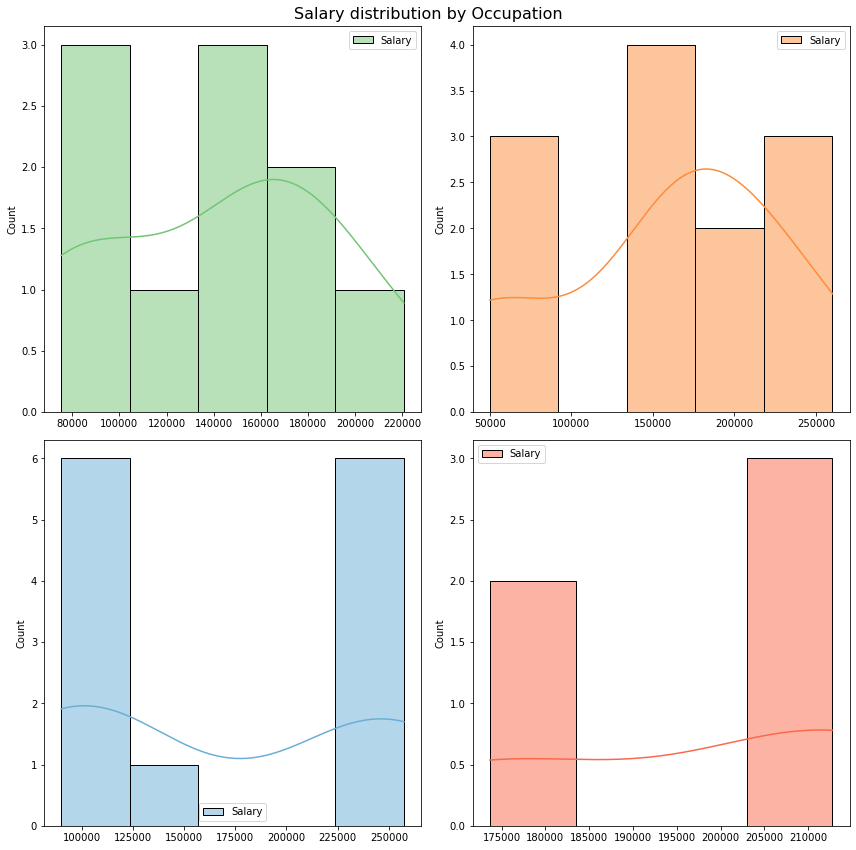

In [22]:
plt.figure(figsize =(12,12))
plt.subplot(2,2,1) ## Row - Column - Order
sns.histplot(d, kde =True, palette= 'Greens') 
plt.subplot(2,2,2) 
sns.histplot(e, kde =True, palette ='Oranges')
plt.subplot(2,2,3)
sns.histplot(f, kde =True, palette='Blues')
plt.subplot(2,2,4)
sns.histplot(g, kde =True, palette='Reds')


plt.suptitle("Salary distribution by Occupation", fontsize =16)
plt.tight_layout();

# Formulate the Null and Alternate Hypothesis

𝐻0 : The mean Salary of an individual is the same across all levels of Occupation 

𝐻1 : The mean Salary of an individual is different for atleast one level of Occupation

# One Way Anova
**Now, let us go ahead and perform one way ANOVA with 'Occupation' with respect to 'Salary'.**

In [23]:
formula = 'Salary ~ C(Occupation)' ## y = f(X)
model = ols(formula, df_o).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


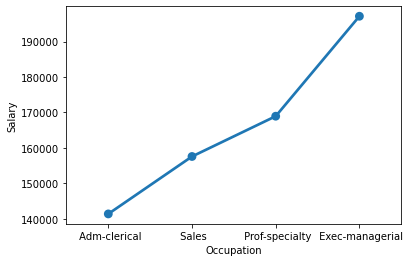

In [24]:
sns.pointplot(x ='Occupation', y='Salary', data =df_o, ci=None);

# Two Way Anova
**Let us now perform the Two Way ANOVA. We will now analyse the effect of both Education and Occupation on the 'Salary' variable.**

In [25]:
formula = 'Salary ~ C(Education) + C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

df        sum_sq       mean_sq          F        PR(>F)
C(Education)    2.0  1.026955e+11  5.134773e+10  31.257677  1.981539e-08
C(Occupation)   3.0  5.519946e+09  1.839982e+09   1.120080  3.545825e-01
Residual       34.0  5.585261e+10  1.642724e+09        NaN           NaN

**Let us check whether there is any interaction effect between the treatments.**

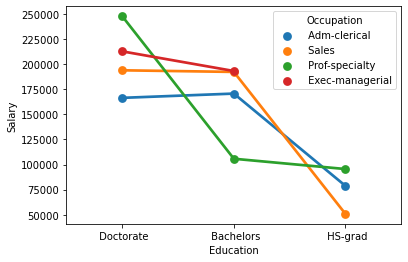

In [26]:
sns.pointplot(x='Education', y='Salary', hue='Occupation', data=df, ci=None); 

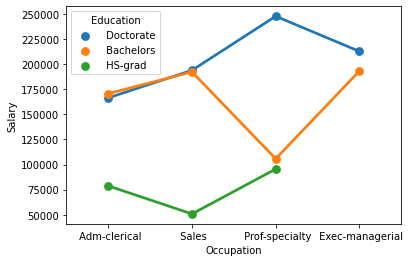

In [27]:
sns.pointplot(x='Occupation', y='Salary', hue='Education', data=df, ci=None); 

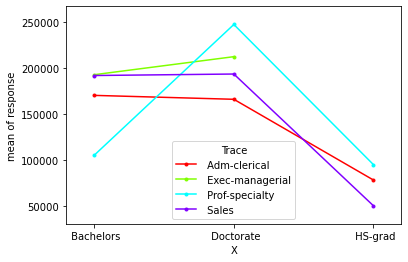

In [28]:
#Method 2 of drawing an interaction plot

from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(np.array(df['Education']),np.array(df['Occupation']),np.array(df['Salary']));

Still, we can see that there is some sort of interaction between the two treatments. So, we will introduce a new term while performing the Two Way ANOVA.

In [29]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN

In [30]:
edu = pd.read_csv("Education+-+Post+12th+Standard.csv")

# Basic Data Exploration 

**In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:**

- **head of the dataset**
- **shape of the dataset**
- **info of the dataset**
- **summary of the dataset**

In [31]:
edu.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [32]:
edu.shape

(777, 18)

In [33]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [34]:
edu.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

In [35]:
## Take Backup of the dataset
edu.to_csv('Educationbackup.csv')

## Check the column names

In [36]:
## Checking the column names
edu.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [37]:
## Removing the space and special characters between words 
edu.columns = edu.columns.str.replace(' ', '')
edu.columns = edu.columns.str.replace('.', '')

In [38]:
## Fixing the column names(dataframe method)
edu = edu.rename(columns={'percalumni': 'Percalumni'})

In [39]:
edu.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'FUndergrad', 'PUndergrad', 'Outstate', 'RoomBoard', 'Books',
       'Personal', 'PhD', 'Terminal', 'SFRatio', 'Percalumni', 'Expend',
       'GradRate'],
      dtype='object')

In [40]:
#Check for presence of duplicate rows
edu.duplicated().sum()

0

# Check for missing value

In [41]:
edu.isnull().sum()

Names         0
Apps          0
Accept        0
Enroll        0
Top10perc     0
Top25perc     0
FUndergrad    0
PUndergrad    0
Outstate      0
RoomBoard     0
Books         0
Personal      0
PhD           0
Terminal      0
SFRatio       0
Percalumni    0
Expend        0
GradRate      0
dtype: int64

### EDA

#### Univariate Analysis

Let us define a function **'univariateAnalysis_numeric'** to display information as part of univariate analysis of numeric variables. The function will accept coulmn name and number of bins as arguments.

The function will display the statistical description of the the numeric variable, histogram or distplot to view the distribution and the box plot to view 5 point summary and outliers if any.



In [42]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(edu[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(edu[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=edu[column])
    plt.show()

Description of Apps
----------------------------------------------------------------------------
count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64 Distribution of Apps
----------------------------------------------------------------------------


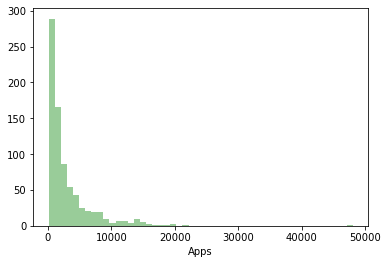

BoxPlot of Apps
----------------------------------------------------------------------------


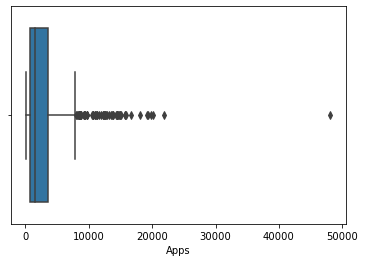

In [43]:
univariateAnalysis_numeric('Apps',20)

In [2]:
edu_num = edu.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(edu_num.columns.values)
len(lstnumericcolumns)

NameError: name 'edu' is not defined

In [45]:
edu_num.head()

Apps  Accept  Enroll  Top10perc  Top25perc  FUndergrad  PUndergrad  \
0  1660    1232     721         23         52        2885         537   
1  2186    1924     512         16         29        2683        1227   
2  1428    1097     336         22         50        1036          99   
3   417     349     137         60         89         510          63   
4   193     146      55         16         44         249         869   

   Outstate  RoomBoard  Books  Personal  PhD  Terminal  SFRatio  Percalumni  \
0      7440       3300    450      2200   70        78     18.1          12   
1     12280       6450    750      1500   29        30     12.2          16   
2     11250       3750    400      1165   53        66     12.9          30   
3     12960       5450    450       875   92        97      7.7          37   
4      7560       4120    800      1500   76        72     11.9           2   

   Expend  GradRate  
0    7041        60  
1   10527        56  
2    8735        54  
3   19016        59  
4   10922        15

In [1]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

NameError: name 'lstnumericcolumns' is not defined

In [47]:
h = len(edu.Names.unique())
print("Number of unique colleges is :", h)

Number of unique colleges is : 777


# Multivariate Analysis

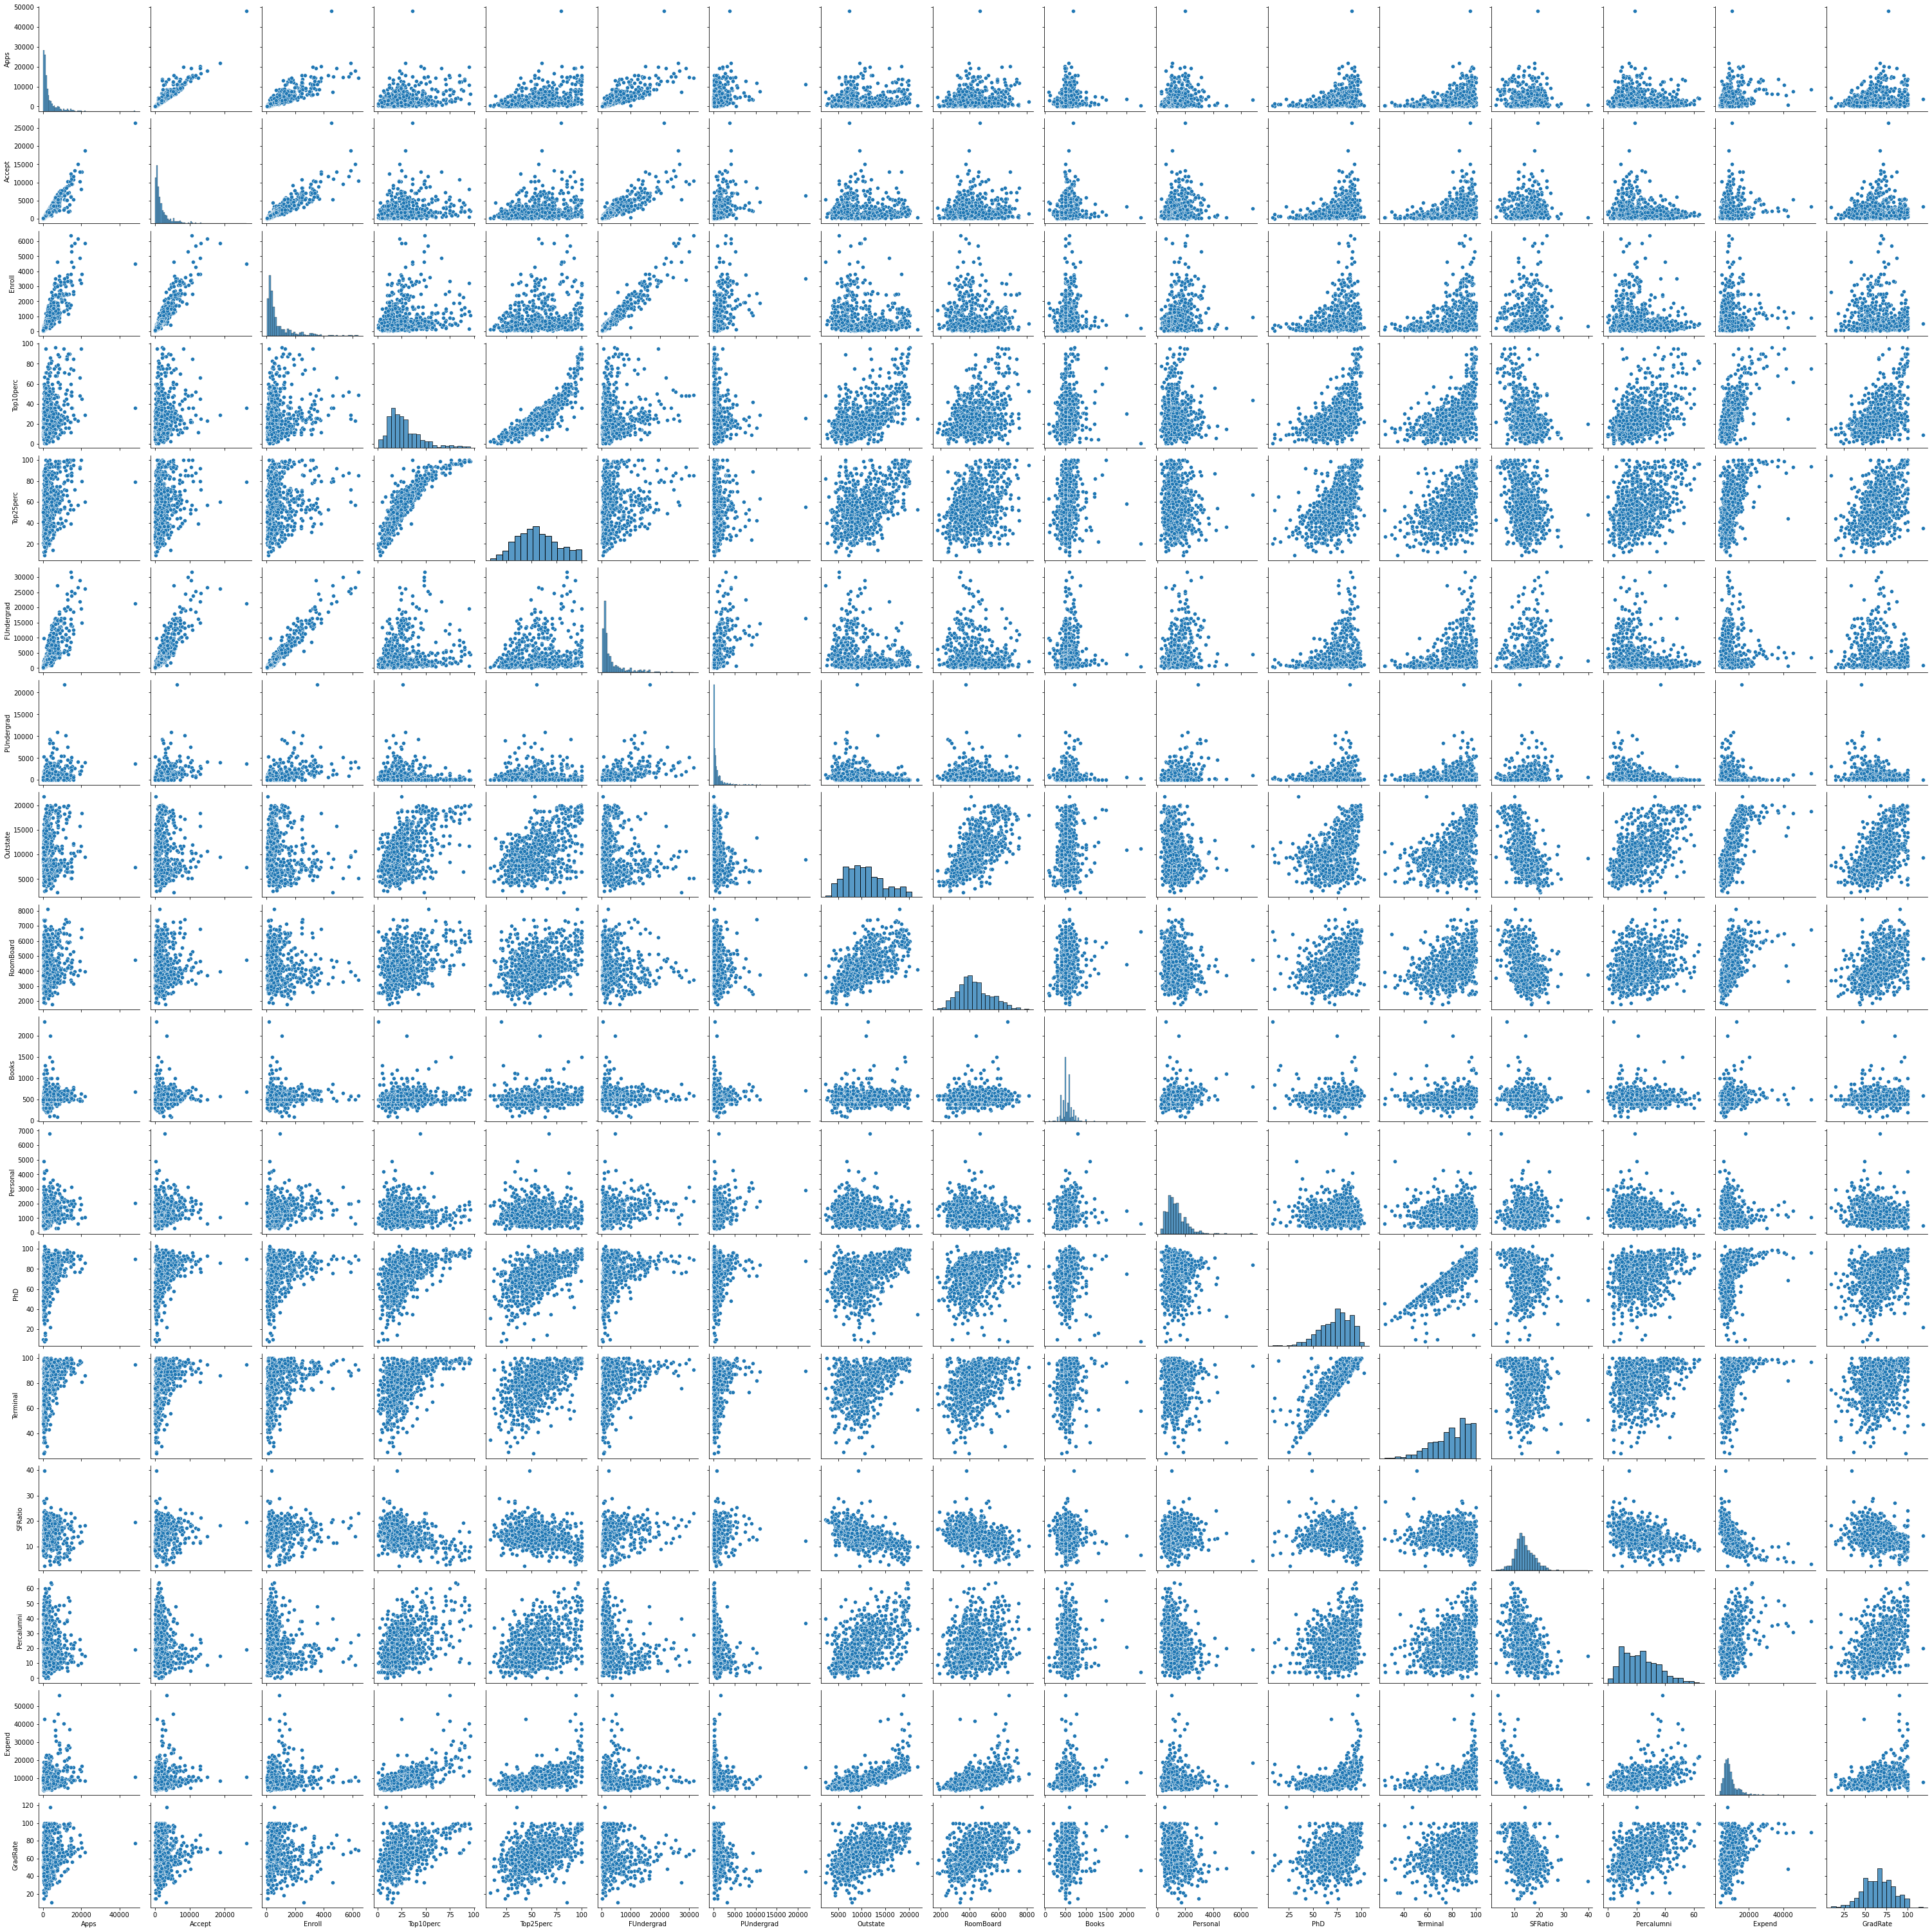

In [48]:
sns.pairplot(edu)

## Correlation Heatmap

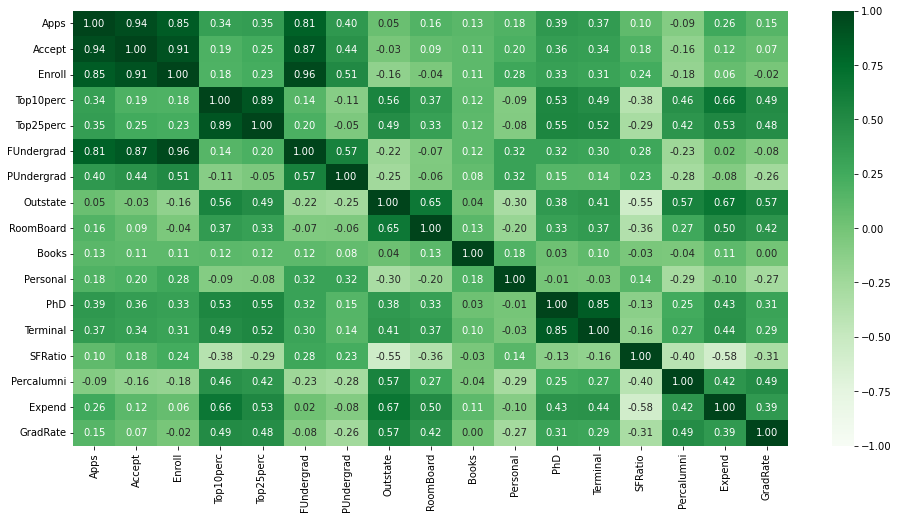

In [49]:
plt.figure(figsize=(16,8))
sns.heatmap(edu.corr(), annot=True, fmt='.2f', cmap='Greens',vmin =-1, vmax =1)
plt.show()

# Normalizing and Scaling

In [52]:
from scipy.stats import zscore
edu_num_scaled=edu_num.apply(zscore)
edu_num_scaled.head()

Apps    Accept    Enroll  Top10perc  Top25perc  FUndergrad  PUndergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827   -0.168116   -0.209207   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911   -0.209788    0.244307   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878   -0.549565   -0.497090   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612   -0.658079   -0.520752   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031   -0.711924    0.009005   

   Outstate  RoomBoard     Books  Personal       PhD  Terminal   SFRatio  \
0 -0.746356  -0.964905 -0.602312  1.270045 -0.163028 -0.115729  1.013776   
1  0.457496   1.909208  1.215880  0.235515 -2.675646 -3.378176 -0.477704   
2  0.201305  -0.554317 -0.905344 -0.259582 -1.204845 -0.931341 -0.300749   
3  0.626633   0.996791 -0.602312 -0.688173  1.185206  1.175657 -1.615274   
4 -0.716508  -0.216723  1.518912  0.235515  0.204672 -0.523535 -0.553542   

   Percalumni    Expend  GradRate  
0   -0.867574 -0.501910 -0.318252  
1   -0.544572  0.166110 -0.551262  
2    0.585935 -0.177290 -0.667767  
3    1.151188  1.792851 -0.376504  
4   -1.675079  0.241803 -2.939613

In [54]:
edu.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   FUndergrad  PUndergrad  Outstate  RoomBoard  Books  Personal  PhD  \
0        2885         537      7440       3300    450      2200   70   
1        2683        1227     12280       6450    750      1500   29   
2        1036          99     11250       3750    400      1165   53   
3         510          63     12960       5450    450       875   92   
4         249         869      7560       4120    800      1500   76   

   Terminal  SFRatio  Percalumni  Expend  GradRate  
0        78     18.1          12    7041        60  
1        30     12.2          16   10527        56  
2        66     12.9          30    8735        54  
3        97      7.7          37   19016        59  
4        72     11.9           2   10922        15

In [55]:
edu_num.head()

Apps  Accept  Enroll  Top10perc  Top25perc  FUndergrad  PUndergrad  \
0  1660    1232     721         23         52        2885         537   
1  2186    1924     512         16         29        2683        1227   
2  1428    1097     336         22         50        1036          99   
3   417     349     137         60         89         510          63   
4   193     146      55         16         44         249         869   

   Outstate  RoomBoard  Books  Personal  PhD  Terminal  SFRatio  Percalumni  \
0      7440       3300    450      2200   70        78     18.1          12   
1     12280       6450    750      1500   29        30     12.2          16   
2     11250       3750    400      1165   53        66     12.9          30   
3     12960       5450    450       875   92        97      7.7          37   
4      7560       4120    800      1500   76        72     11.9           2   

   Expend  GradRate  
0    7041        60  
1   10527        56  
2    8735        54  
3   19016        59  
4   10922        15

In [56]:
edu_num_scaled.head()

Apps    Accept    Enroll  Top10perc  Top25perc  FUndergrad  PUndergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827   -0.168116   -0.209207   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911   -0.209788    0.244307   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878   -0.549565   -0.497090   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612   -0.658079   -0.520752   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031   -0.711924    0.009005   

   Outstate  RoomBoard     Books  Personal       PhD  Terminal   SFRatio  \
0 -0.746356  -0.964905 -0.602312  1.270045 -0.163028 -0.115729  1.013776   
1  0.457496   1.909208  1.215880  0.235515 -2.675646 -3.378176 -0.477704   
2  0.201305  -0.554317 -0.905344 -0.259582 -1.204845 -0.931341 -0.300749   
3  0.626633   0.996791 -0.602312 -0.688173  1.185206  1.175657 -1.615274   
4 -0.716508  -0.216723  1.518912  0.235515  0.204672 -0.523535 -0.553542   

   Percalumni    Expend  GradRate  
0   -0.867574 -0.501910 -0.318252  
1   -0.544572  0.166110 -0.551262  
2    0.585935 -0.177290 -0.667767  
3    1.151188  1.792851 -0.376504  
4   -1.675079  0.241803 -2.939613

In [57]:
corr = edu_num_scaled.corr(method='pearson')

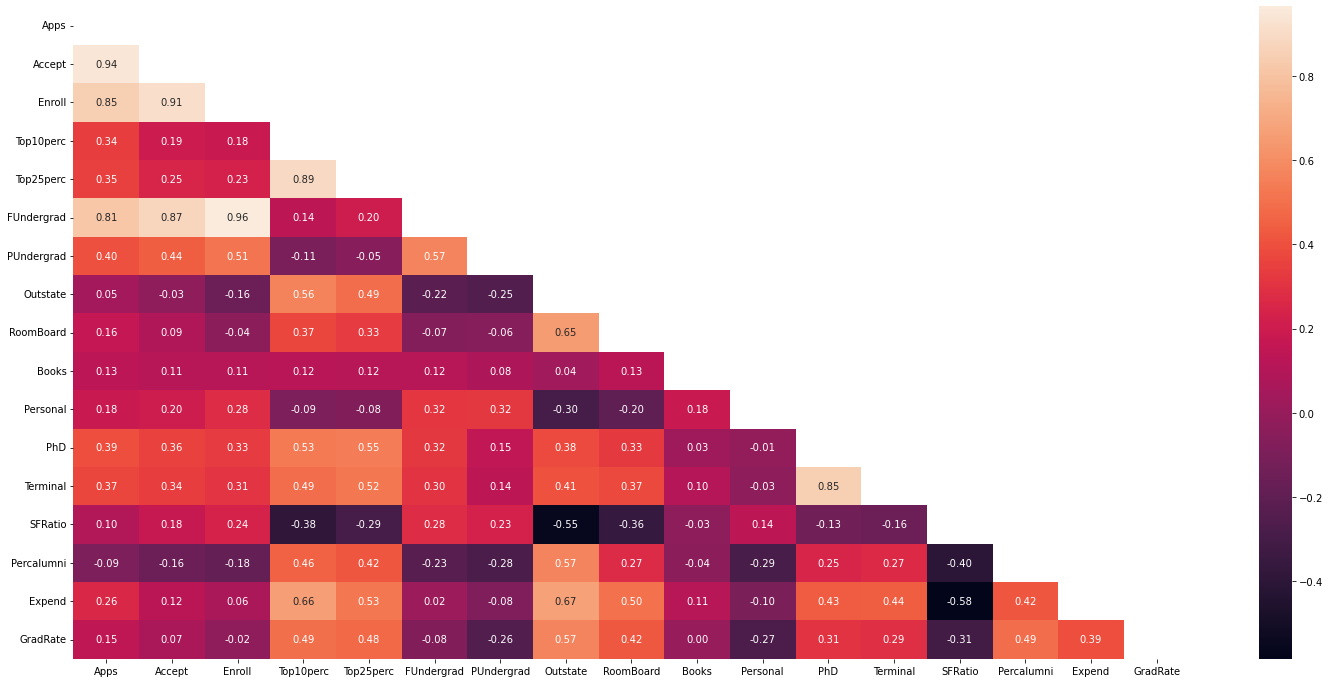

In [58]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 12))
sns.heatmap(edu_num_scaled.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

In [84]:
cov_matrix = np.cov(edu_num_scaled.T)

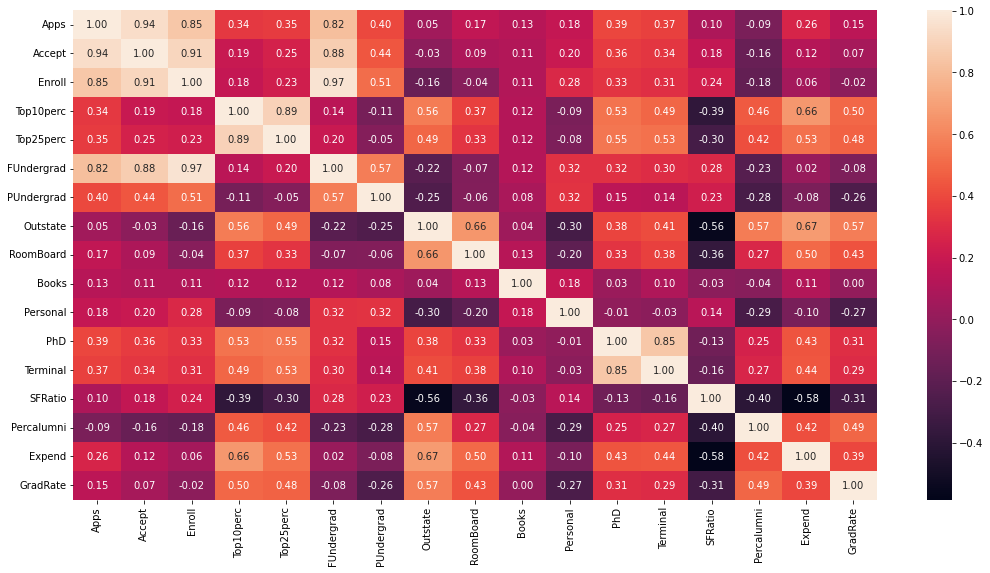

In [94]:
plt.figure(figsize =(18,9))
x1 = ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'FUndergrad', 'PUndergrad', 
     'Outstate', 'RoomBoard', 'Books', 'Personal', 'PhD', 'Terminal', 'SFRatio', 'Percalumni', 'Expend', 'GradRate']
sns.heatmap(cov_matrix, annot=True, fmt='.2f', xticklabels = x1, yticklabels = x1)
plt.show()

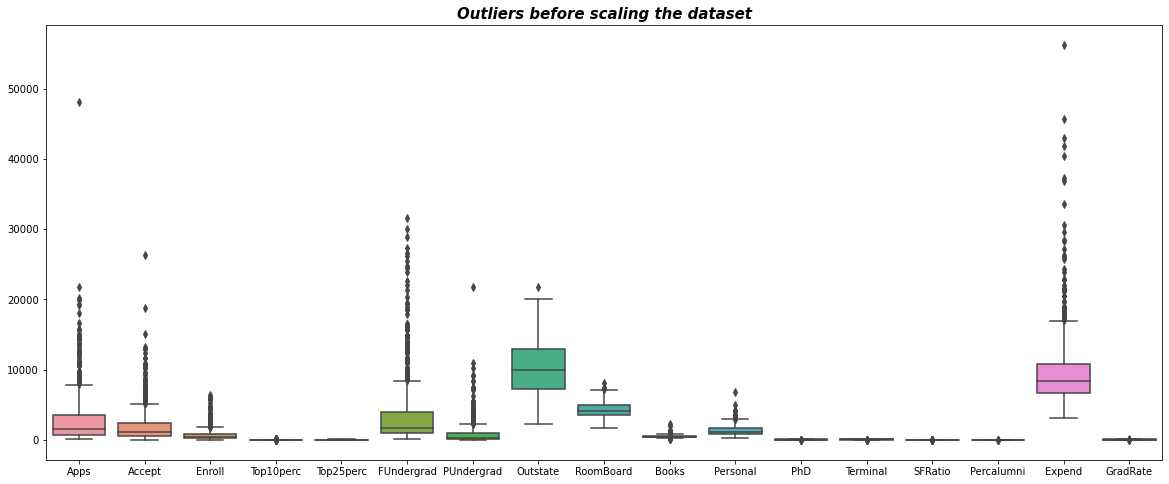

In [59]:
plt.figure(figsize=(20,8))
ab = sns.boxplot(data=edu)
ab.set_title("Outliers before scaling the dataset", fontsize=15, weight='bold', style='italic')
plt.show()

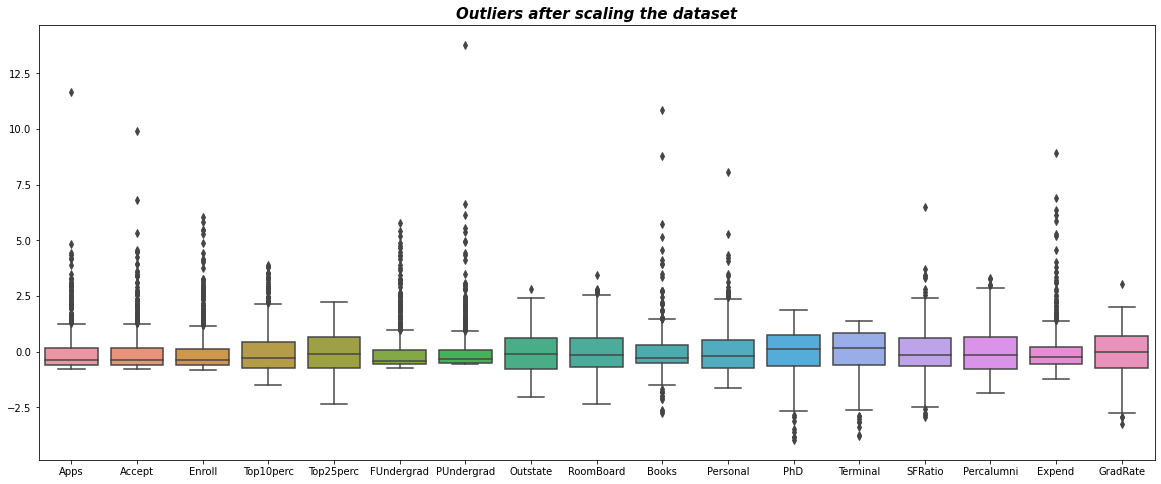

In [62]:
plt.figure(figsize=(20,8))
ab_s = sns.boxplot(data = edu_num_scaled)
ab_s.set_title("Outliers after scaling the dataset", fontsize=15, weight='bold', style='italic')
plt.show()

### Statistical tests to be done before PCA

#### Bartletts Test of Sphericity
Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

- H0: All variables in the data are uncorrelated
- Ha: At least one pair of variables in the data are correlated

If the null hypothesis cannot be rejected, then PCA is not advisable.

If the p-value is small, then we can reject the null hypothesis and agree that there is atleast one pair of vairbales in the data wihich are correlated hence PCA is recommended.

In [69]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(edu_num_scaled)
p_value

0.0

#### KMO Test

The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [70]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(edu_num_scaled)
kmo_model

0.8131251200373522

In [71]:
# Step 1- Create the covariance Matrix
cov_matrix = np.cov(edu_num_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

In [72]:
# Step 2- Get eigen values and eigen vector
# Note: eigen values is always returned in descending order
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('\n')
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [5.45052162 4.48360686 1.17466761 1.00820573 0.93423123 0.84849117
 0.6057878  0.58787222 0.53061262 0.4043029  0.02302787 0.03672545
 0.31344588 0.08802464 0.1439785  0.16779415 0.22061096]


Eigen Vectors 
 %s [[-2.48765602e-01  3.31598227e-01  6.30921033e-02 -2.81310530e-01
   5.74140964e-03  1.62374420e-02  4.24863486e-02  1.03090398e-01
   9.02270802e-02 -5.25098025e-02  3.58970400e-01 -4.59139498e-01
   4.30462074e-02 -1.33405806e-01  8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [-2.07601502e-01  3.72116750e-01  1.01249056e-01 -2.67817346e-01
   5.57860920e-02 -7.53468452e-03  1.29497196e-02  5.62709623e-02
   1.77864814e-01 -4.11400844e-02 -5.43427250e-01  5.18568789e-01
  -5.84055850e-02  1.45497511e-01  3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [-1.76303592e-01  4.03724252e-01  8.29855709e-02 -1.61826771e-01
  -5.56936353e-02  4.25579803e-02  2.76928937e-02 -5.86623552e-02
   1.28560713e-01 -3.44879147e-02  6.09651110e-01  4.04318439e-01
  -6

In [73]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 32.0206282   58.36084263  65.26175919  71.18474841  76.67315352
  81.65785448  85.21672597  88.67034731  91.78758099  94.16277251
  96.00419883  97.30024023  98.28599436  99.13183669  99.64896227
  99.86471628 100.        ]


### Scree plot

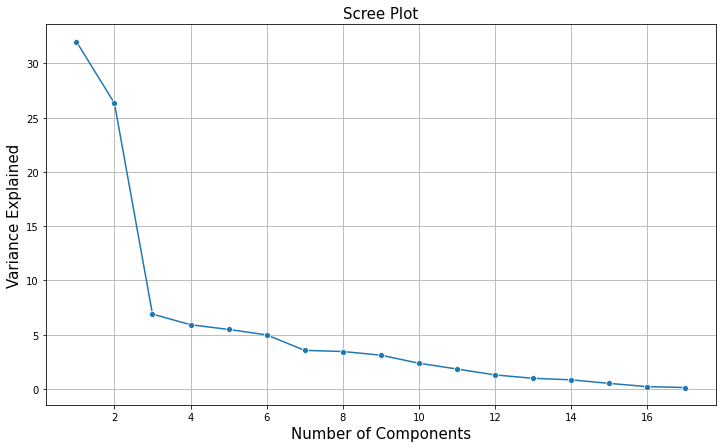

In [74]:
# Step 3 View Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

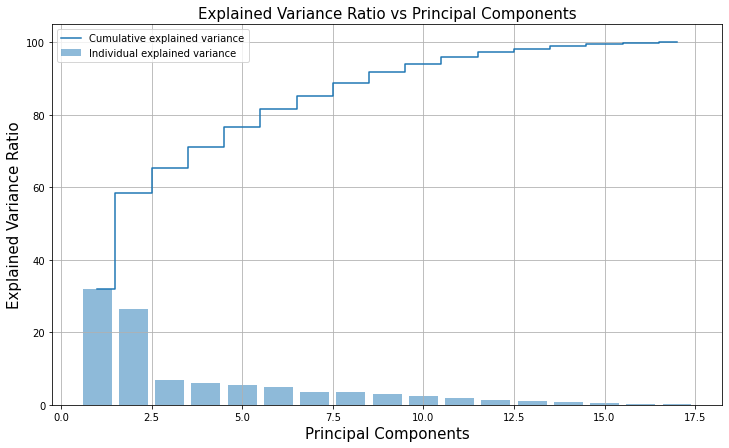

In [75]:
# Ploting  -Option -2 Plot Cumulative explained variance and individual explained variance vs Principal Components
plt.figure(figsize=(12 ,7))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio',fontsize=15)
plt.xlabel('Principal Components',fontsize=15)
plt.title('Explained Variance Ratio vs Principal Components',fontsize=15)
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [76]:
#Apply PCA taking all 17 features
from sklearn.decomposition import PCA
pca = PCA(n_components=17, random_state=123)
edu_pca_transformed = pca.fit_transform(edu_num_scaled)

In [82]:
#Create a dataframe containing the loadings or coefficients of all PCs
edu_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12',
                                               'PC13','PC14','PC15','PC16','PC17'],
                                    index = edu_num_scaled.columns)

In [83]:
edu_extracted_loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
Apps        0.248766  0.331598 -0.063092  0.281311  0.005741 -0.016237   
Accept      0.207602  0.372117 -0.101249  0.267817  0.055786  0.007535   
Enroll      0.176304  0.403724 -0.082986  0.161827 -0.055694 -0.042558   
Top10perc   0.354274 -0.082412  0.035056 -0.051547 -0.395434 -0.052693   
Top25perc   0.344001 -0.044779 -0.024148 -0.109767 -0.426534  0.033092   
FUndergrad  0.154641  0.417674 -0.061393  0.100412 -0.043454 -0.043454   
PUndergrad  0.026443  0.315088  0.139682 -0.158558  0.302385 -0.191199   
Outstate    0.294736 -0.249644  0.046599  0.131291  0.222532 -0.030000   
RoomBoard   0.249030 -0.137809  0.148967  0.184996  0.560919  0.162755   
Books       0.064758  0.056342  0.677412  0.087089 -0.127289  0.641055   
Personal   -0.042529  0.219929  0.499721 -0.230711 -0.222311 -0.331398   
PhD         0.318313  0.058311 -0.127028 -0.534725  0.140166  0.091256   
Terminal    0.317056  0.046429 -0.066038 -0.519443  0.204720  0.154928   
SFRatio    -0.176958  0.246665 -0.289848 -0.161189 -0.079388  0.487046   
Percalumni  0.205082 -0.246595 -0.146989  0.017314 -0.216297 -0.047340   
Expend      0.318909 -0.131690  0.226744  0.079273  0.075958 -0.298119   
GradRate    0.252316 -0.169241 -0.208065  0.269129 -0.109268  0.216163   

                 PC7       PC8       PC9      PC10      PC11      PC12  \
Apps       -0.042486 -0.103090 -0.090227  0.052510  0.043046  0.024071   
Accept     -0.012950 -0.056271 -0.177865  0.041140 -0.058406 -0.145102   
Enroll     -0.027693  0.058662 -0.128561  0.034488 -0.069399  0.011143   
Top10perc  -0.161332 -0.122678  0.341100  0.064026 -0.008105  0.038554   
Top25perc  -0.118486 -0.102492  0.403712  0.014549 -0.273128 -0.089352   
FUndergrad -0.025076  0.078890 -0.059442  0.020847 -0.081158  0.056177   
PUndergrad  0.061042  0.570784  0.560673 -0.223106  0.100693 -0.063536   
Outstate    0.108529  0.009846 -0.004573  0.186675  0.143221 -0.823444   
RoomBoard   0.209744 -0.221453  0.275023  0.298324 -0.359322  0.354560   
Books      -0.149692  0.213293 -0.133663 -0.082029  0.031940 -0.028159   
Personal    0.633790 -0.232661 -0.094469  0.136028 -0.018578 -0.039264   
PhD        -0.001096 -0.077040 -0.185182 -0.123452  0.040372  0.023222   
Terminal   -0.028477 -0.012161 -0.254938 -0.088578 -0.058973  0.016485   
SFRatio     0.219259 -0.083605  0.274544  0.472045  0.445001 -0.011026   
Percalumni  0.243321  0.678524 -0.255335  0.423000 -0.130728  0.182661   
Expend     -0.226584 -0.054159 -0.049139  0.132286  0.692089  0.325982   
GradRate    0.559944 -0.005336  0.041904 -0.590271  0.219839  0.122107   

                PC13      PC14      PC15      PC16      PC17  
Apps        0.595831  0.080633  0.133406  0.459139  0.358970  
Accept      0.292642  0.033467 -0.145498 -0.518569 -0.543427  
Enroll     -0.444638 -0.085697  0.029590 -0.404318  0.609651  
Top10perc   0.001023 -0.107828  0.697723 -0.148739 -0.144986  
Top25perc   0.021884  0.151742 -0.617275  0.051868  0.080348  
FUndergrad -0.523622 -0.056373  0.009916  0.560363 -0.414705  
PUndergrad  0.125998  0.019286  0.020952 -0.052731  0.009018  
Outstate   -0.141856 -0.034012  0.038354  0.101595  0.050900  
RoomBoard  -0.069749 -0.058429  0.003402 -0.025929  0.001146  
Books       0.011438 -0.066849 -0.009439  0.002883  0.000773  
Personal    0.039455  0.027529 -0.003090 -0.012890 -0.001114  
PhD         0.127696 -0.691126 -0.112056  0.029808  0.013813  
Terminal   -0.058313  0.671009  0.158910 -0.027076  0.006209  
SFRatio    -0.017715  0.041374 -0.020899 -0.021248 -0.002222  
Percalumni  0.104088 -0.027154 -0.008418  0.003334 -0.019187  
Expend     -0.093746  0.073123 -0.227742 -0.043880 -0.035310  
GradRate   -0.069197  0.036477 -0.003394 -0.005008 -0.013071

In [79]:
## print('The Linear eq of 1st component: ')
for i in range(0,edu_num_scaled.shape[1]):
    print('{} * {}'.format(np.round(pca.components_[0][i],3),edu_num_scaled.columns[i]),end='  ')

0.249 * Apps  0.208 * Accept  0.176 * Enroll  0.354 * Top10perc  0.344 * Top25perc  0.155 * FUndergrad  0.026 * PUndergrad  0.295 * Outstate  0.249 * RoomBoard  0.065 * Books  -0.043 * Personal  0.318 * PhD  0.317 * Terminal  -0.177 * SFRatio  0.205 * Percalumni  0.319 * Expend  0.252 * GradRate  